In [1]:
from datetime import datetime

import biosppy as bp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

from ltbio.biosignals import modalities, Event
from ltbio.biosignals.sources.BitalinoShort import BitalinoShort


In [2]:

path_ = 'D:\\PreEpiSeizures\\Patients_HEM\\FCSFDM\\Bitalino'
options = {'date1': datetime(2021, 4, 15, 14, 45, 49),
           'date2': datetime(2021, 4, 15, 14, 49, 32)}
data = BitalinoShort._read(dir=path_, type=modalities.RESP, **options)

In [3]:
sig = data['PZT_chest']

In [4]:
event1 = Event('crise 4', datetime(2021, 4, 15, 14, 47, 32))

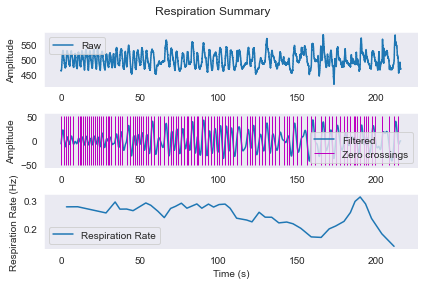

In [5]:
resp_info = bp.signals.resp.resp(sig.to_array())

In [6]:
rrate_idx = (resp_info['resp_rate_ts'] * sig.sampling_frequency).astype(int)
rrate = 60 * resp_info['resp_rate']
resp_sig = resp_info['filtered']
ts = resp_info['ts']

In [16]:
smooth_rrate = bp.signals.tools.smoother(rrate, size=3)['signal']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


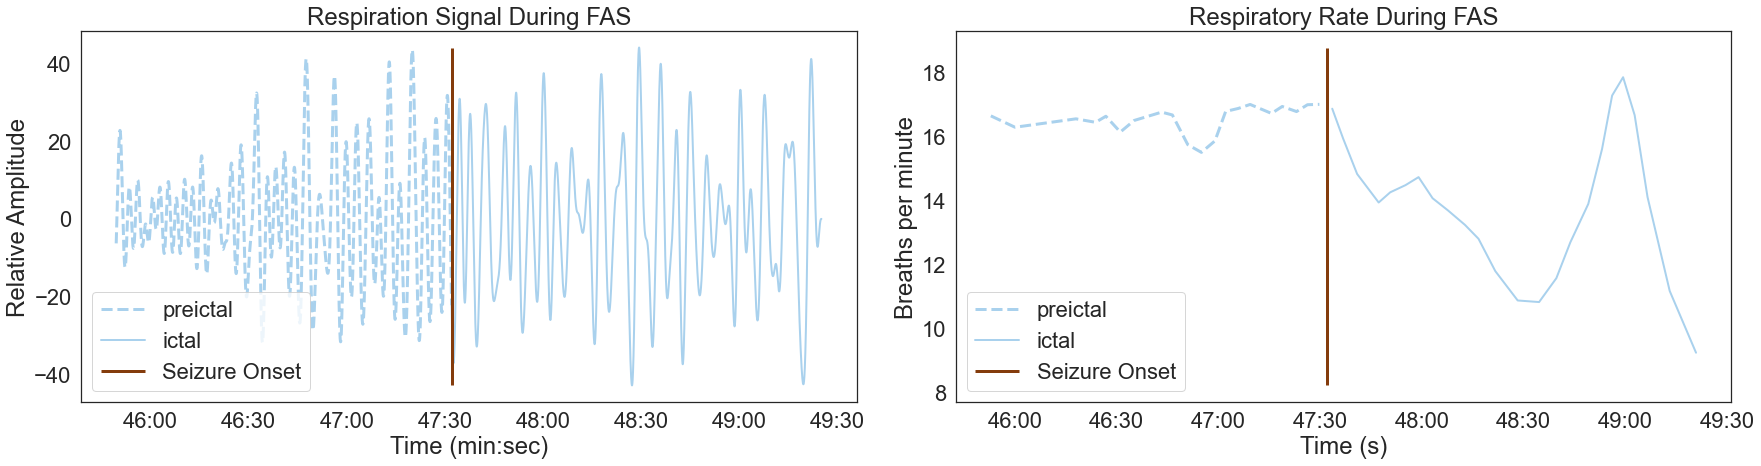

In [18]:
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }

color_resp = colors['lightblue']
color_onset = colors['onset']
color_rate = colors['lightblue']

sb.set(font_scale=2)
sb.set_style(style='white')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))

# plt.title('Respiratory Rate During Seizure')
ax2.set_ylabel('Breaths per minute')
ax2.set_xlabel('Time (s)')
ax1.set_ylabel('Relative Amplitude')
ax1.set_xlabel('Time (min:sec)')
ax2.set_title('Respiratory Rate During FAS')
ax1.set_title('Respiration Signal During FAS')

x_axis = pd.date_range(sig.initial_datetime, sig.final_datetime, periods=len(sig))
ax2.plot(x_axis[rrate_idx][x_axis[rrate_idx] <= event1.onset], smooth_rrate[:len(x_axis[rrate_idx][x_axis[rrate_idx] <= event1.onset])], linewidth=3,
         color=color_rate, label='preictal', linestyle='dashed')
ax1.plot(x_axis[x_axis <= event1.onset], resp_sig[:len(x_axis[x_axis <= event1.onset])], linewidth=3,
         color=color_resp, label='preictal', linestyle='dashed')

ax1.plot(x_axis[x_axis >= event1.onset], resp_sig[-len(x_axis[x_axis >= event1.onset]):], linewidth=2, color=color_resp, label='ictal')
ax2.plot(x_axis[rrate_idx][x_axis[rrate_idx] >= event1.onset], smooth_rrate[-len(x_axis[rrate_idx][x_axis[rrate_idx] >= event1.onset]):], linewidth=2, color=color_rate, label='ictal')


from matplotlib.dates import DateFormatter
ax1.vlines(event1.onset, np.max(resp_sig), np.min(resp_sig), color= color_onset, label='Seizure Onset', linewidth=3)
ax2.vlines(event1.onset, np.max(rrate), np.min(rrate), color= color_onset, label='Seizure Onset', linewidth=3)

ax1.xaxis.set_major_formatter(DateFormatter('%M:%S'))
ax2.xaxis.set_major_formatter(DateFormatter('%M:%S'))


ax1.legend()
ax2.legend()
plt.tight_layout()
figname = 'C:\\Users\\Mariana\\Documents\\Epilepsy\\images\\resp_during_seizure'
plt.savefig(figname + '.png')
plt.savefig(figname + '.eps', format='eps')
plt.show()
